## FFP Neural Networks

using ex3data1.mat,ex3weight.mat

In this part,your goal is to implement the feedforward propagation algorithm to use our weights for prediction.

### 2.1 Model representation

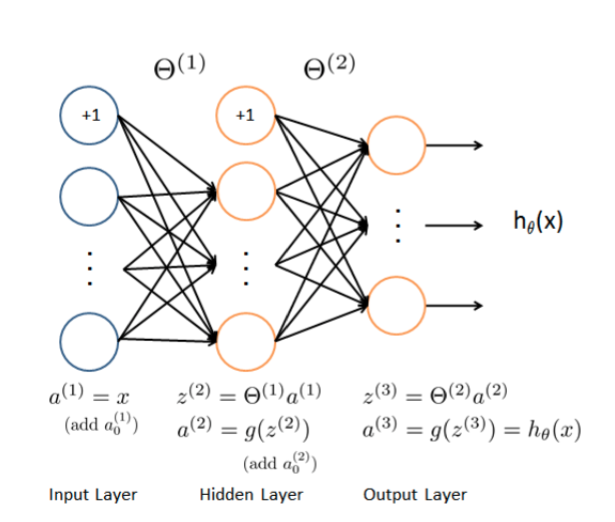

In [1]:
from IPython.display import Image
Image(filename='./nn_model.png',width=500, height=100)

Our neural network is shown in figure.

It has 3 layers,an input layer,a hidden layer and an output layer.

Image are of size 20x20,this give up a 400 input layer units(not count the bias unit)

And the parameters $(\theta_{1},\theta_{2})$ already trained by us.These are stored in ex3weights.mat 


In [2]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataWeight=loadmat('ex3weights.mat')
theta1=dataWeight['Theta1']
theta2=dataWeight['Theta2']
print("Weight: \n {}".format(dataWeight))
print("Theta1: \n {}".format(theta1))
print("Theta2: \n {}".format(theta2))
print("The shape of theta1 is {}".format(theta1.shape))
print("The shape of theta2 is {}".format(theta2.shape))

Weight: 
 {'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Oct 18 14:57:02 2011', '__version__': '1.0', '__globals__': [], 'Theta1': array([[-2.25623899e-02, -1.05624163e-08,  2.19414684e-09, ...,
        -1.30529929e-05, -5.04175101e-06,  2.80464449e-09],
       [-9.83811294e-02,  7.66168682e-09, -9.75873689e-09, ...,
        -5.60134007e-05,  2.00940969e-07,  3.54422854e-09],
       [ 1.16156052e-01, -8.77654466e-09,  8.16037764e-09, ...,
        -1.20951657e-04, -2.33669661e-06, -7.50668099e-09],
       ...,
       [-1.83220638e-01, -8.89272060e-09, -9.81968100e-09, ...,
         2.35311186e-05, -3.25484493e-06,  9.02499060e-09],
       [-7.02096331e-01,  3.05178374e-10,  2.56061008e-09, ...,
        -8.61759744e-04,  9.43449909e-05,  3.83761998e-09],
       [-3.50933229e-01,  8.85876862e-09, -6.57515140e-10, ...,
        -1.80365926e-06, -8.14464807e-06,  8.79454531e-09]]), 'Theta2': array([[-0.76100352, -1.21244498, -0.10187131, -2.36850085, -1.05778129,
  

In [4]:
dataSet=loadmat('ex3data1.mat')
X=dataSet['X']
X=np.insert(X,0,values=np.ones(X.shape[0]),axis=1)
y=dataSet['y']
print("The shape of X: {}".format(X.shape))
print("The shape of y: {}".format(y.shape))

The shape of X: (5000, 401)
The shape of y: (5000, 1)


### 2.2 Feedforward Propagation and Prediction 

In [5]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [6]:
#Initial
a1=np.mat(X) #第一层的输入
w1=np.mat(theta1)
w2=np.mat(theta2)
print("a1 shape:{}\nw1 shape:{}\nw2 shape:{}".format(a1.shape,w1.shape,w2.shape))

a1 shape:(5000, 401)
w1 shape:(25, 401)
w2 shape:(10, 26)


In [7]:
z2=a1*w1.T
z2=np.insert(z2,0,values=np.ones(z2.shape[0]),axis=1)
print("The shape of z2 is {}".format(z2.shape))
a2=sigmoid(z2) #第二层的输入

z3=a2*w2.T
print("The shape of z3 is {}".format(z3.shape))
a3=sigmoid(z3)

The shape of z2 is (5000, 26)
The shape of z3 is (5000, 10)


In [8]:
yPred=np.argmax(a3,axis=1)+1
print("yPred shape:{}".format(yPred.shape))

yPred shape:(5000, 1)


In [9]:
from sklearn.metrics import classification_report
print(classification_report(y,yPred))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97       500
           2       0.98      0.97      0.97       500
           3       0.98      0.96      0.97       500
           4       0.97      0.97      0.97       500
           5       0.98      0.98      0.98       500
           6       0.97      0.99      0.98       500
           7       0.98      0.97      0.97       500
           8       0.98      0.98      0.98       500
           9       0.97      0.96      0.96       500
          10       0.98      0.99      0.99       500

    accuracy                           0.98      5000
   macro avg       0.98      0.98      0.98      5000
weighted avg       0.98      0.98      0.98      5000

